In [1]:
# Run the tutorial in source directory and keep data in data directory 
# the  cell 1 after this cell  contain neccessary function to generate results
# main code start after this  

In [2]:
from for_radon_inv import *
from hoyer import *
from scipy.io import loadmat

In [3]:
import warnings
warnings.filterwarnings('ignore') 
# Load the .mat file
directory="../data/Data_real_with_multiples.mat"
data_real = loadmat(directory)

print(data_real.keys())

d_r=data_real['D']
D=d_r#[799:1200,:]
H=data_real['H']
# dt=data['dtsec']
Mutes = np.ones(D.shape)
I = np.where(D == 0)[0]
print(I)
I.shape
h_real = H['offset'][0] 
print(h_real.shape)
dt_real = 0.0040
# Define parameters for Radon Demultiple
N = 2  
qmin = -0.3
qmax = .8
nq = 120
flow = 5.0
fhigh = 80
mu = 0.1
q_cut = 0.1
q = np.linspace(qmin,qmax, nq) 
h_real=np.squeeze(h_real)
h_real.shape
h_real = np.asarray(h_real, dtype=np.float64).flatten()

dict_keys(['__header__', '__version__', '__globals__', 'D', 'H'])
[   0    0    0 ... 1750 1750 1750]
(92,)


In [4]:
import warnings
warnings.filterwarnings('ignore')  
print(type(D),D.shape,"=d")
print(type(q),q.shape,"=q")
print(type(h_real),h_real.shape,"=h")
D.shape

<class 'numpy.ndarray'> (1751, 92) =d
<class 'numpy.ndarray'> (120,) =q
<class 'numpy.ndarray'> (92,) =h


(1751, 92)

In [5]:
x_hoyer_real, final_iter=\
                SD_hoyer_squared_radon(forward_radon_freq,inverse_radon_freq, D, dt_real, h_real, q, N, flow, fhigh,\
                1e-4,.3,max_iter=3000, tol=1e-6)

In [6]:
nt, nh = D.shape
tau = np.arange(0, nt) * dt_real
Offset=np.abs(h_real)*0.3048 # change ft to meter
nq = len(q)
q_cut=0.3
qmin= np.min(q)
qmax=np.max(q)
dq = (qmax-qmin)/(nq-1)

iq_cut = np.floor((q_cut-qmin)/dq)+1;
iq_cut = int(iq_cut) 
print(iq_cut)
M1 =x_hoyer_real.copy() 

#Apply muting the primary region coefficients 

M1[0:900,:]=0;
dip=(iq_cut-50)/(nt-900);
for i in range(900,nt):
    M1[i,0:iq_cut-int(dip*(i-900))]=0;
    
d_radon_real=forward_radon_freq(M1, dt_real, h_real, q, N, flow, fhigh)
prim_real=D-d_radon_real

65


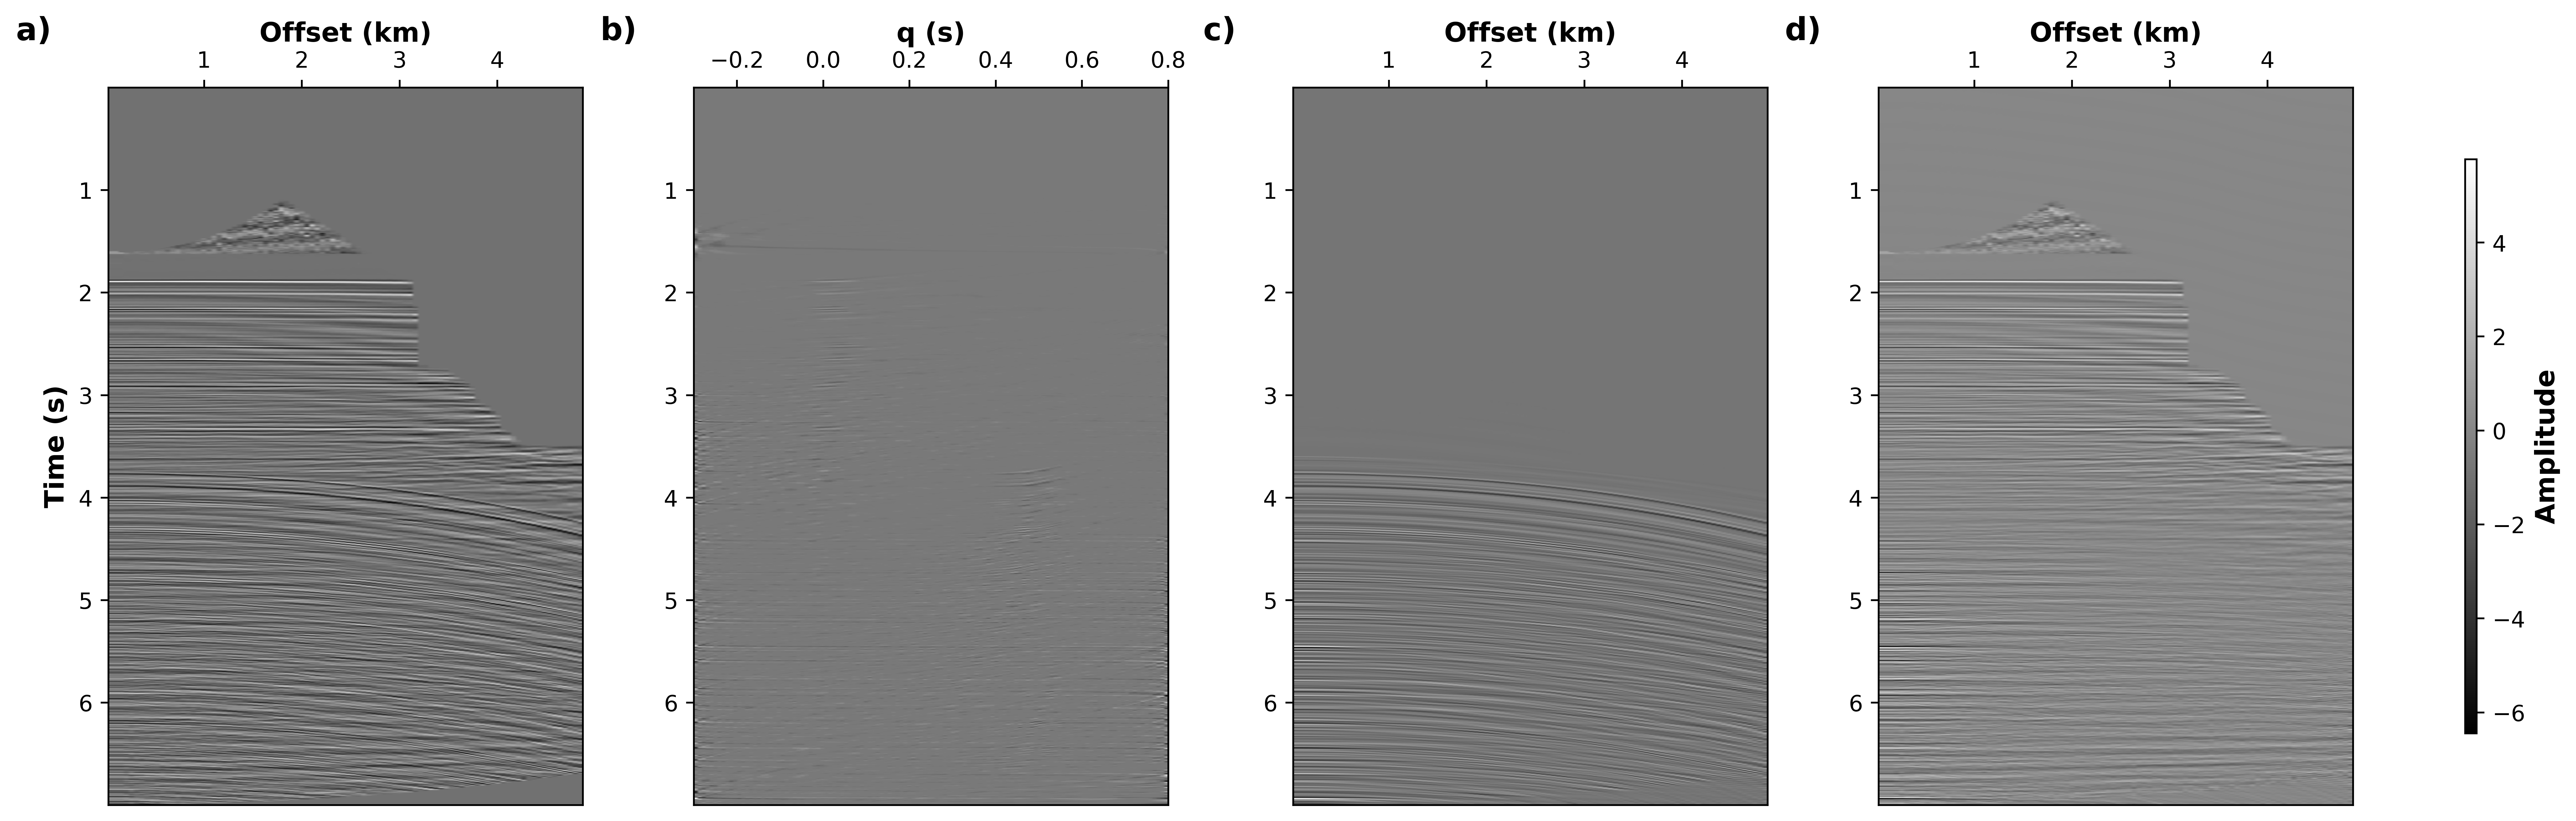

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create a high-quality figure
fig, axes = plt.subplots(1, 4, figsize=(16, 5), dpi=600, constrained_layout=True)

# Define tick values (adjust based on your data range)
#x_ticks_offset = np.linspace(np.min(Offset)/1000, np.max(Offset)/1000, 5)
# x_ticks_q = int(np.linspace(np.min(q), np.max(q), 5))
# y_ticks_tau = np.linspace(np.min(tau), np.max(tau), 5)

x_ticks_offset = np.linspace(1, 4, 4)
x_ticks_q = np.linspace(-.2, 0.8, 6)
y_ticks_tau = np.linspace(1, 6, 6)

# Plot True Data
ax = axes[0]
im1 = ax.imshow(D, extent=[np.min(Offset)/1000, np.max(Offset)/1000, np.max(tau), np.min(tau)],
                aspect='auto', origin='upper', cmap='gray')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Offset (km)', fontsize=12, fontweight='bold')
ax.set_ylabel('Time (s)', fontsize=12, fontweight='bold')
ax.set_xticks(x_ticks_offset)
ax.set_yticks(y_ticks_tau)
# Place label "a)" to the left (negative x) and at the top of the axes
ax.text(-0.12, 1.1, 'a)', transform=ax.transAxes, fontsize=14, fontweight='bold',
        ha='right', va='top', color='black')

# Plot Predicted Model
ax = axes[1]
im2 = ax.imshow(x_hoyer_real, extent=[np.min(q), np.max(q), np.max(tau), np.min(tau)],
                aspect='auto', origin='upper', cmap='gray')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('q (s)', fontsize=12, fontweight='bold')
ax.set_xticks(x_ticks_q)
ax.set_yticks(y_ticks_tau)
ax.text(-0.12, 1.1, 'b)', transform=ax.transAxes, fontsize=14, fontweight='bold',
        ha='right', va='top', color='black')

# Plot Predicted Multiples
ax = axes[2]
im3 = ax.imshow(d_radon_real, extent=[np.min(Offset)/1000, np.max(Offset)/1000, np.max(tau), np.min(tau)],
                aspect='auto', origin='upper', cmap='gray')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Offset (km)', fontsize=12, fontweight='bold')
ax.set_xticks(x_ticks_offset)
ax.set_yticks(y_ticks_tau)
ax.text(-0.12, 1.1, 'c)', transform=ax.transAxes, fontsize=14, fontweight='bold',
        ha='right', va='top', color='black')

# Plot Predicted Primaries
ax = axes[3]
im4 = ax.imshow(prim_real, extent=[np.min(Offset)/1000, np.max(Offset)/1000, np.max(tau), np.min(tau)],
                aspect='auto', origin='upper', cmap='gray')
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Offset (km)', fontsize=12, fontweight='bold')
ax.set_xticks(x_ticks_offset)
ax.set_yticks(y_ticks_tau)
ax.text(-0.12, 1.1, 'd)', transform=ax.transAxes, fontsize=14, fontweight='bold',
        ha='right', va='top', color='black')

# Add a single colorbar to the last subplot
cbar = fig.colorbar(im4, ax=axes, location='right', aspect=50, shrink=0.8)
cbar.set_label("Amplitude", fontsize=12, fontweight='bold')


import os
# Define the directory path
save_dir = '../results/multiple_supression/'

# Create the directory if it does not exist
os.makedirs(save_dir, exist_ok=True)

# Define the full file path
dirt = os.path.join(save_dir, "seismic_SD_multiple_real.pdf")

# Save high-quality grayscale image
plt.savefig(dirt, dpi=600, bbox_inches='tight')
plt.show()